# (Ford Bike-Go Findings)
## by (Ahmed Essam)

## Investigation Overview

> Show interesting relationships between variables and insights gained in the exploration phase.

## Dataset Overview

> The Ford-Go Bikes dataset contains information about every trip that was made in february 2019 and has many variable such as trip duration and member age, type(customer or subscriber), gender .... etc. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# read the csv file, and check its top 10 rows
df_clean = pd.read_csv("clean_data.csv")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> We can notice here that most trips take between 3 to 12 minutes.

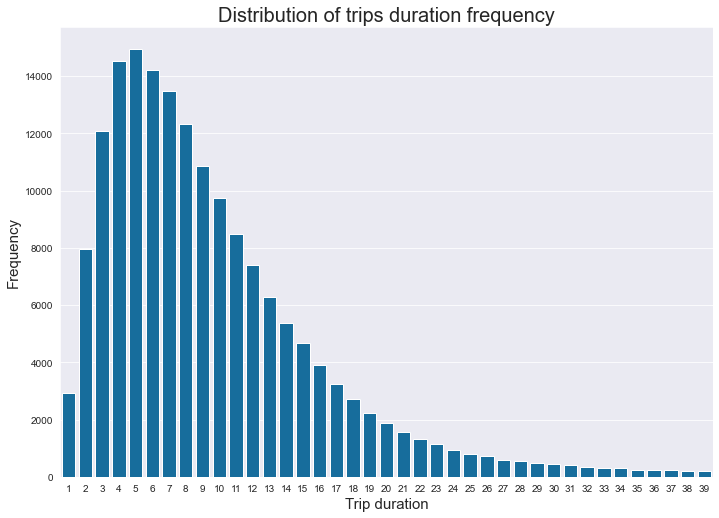

In [3]:
sb.set_style('darkgrid')
plt.figure(figsize=[ 11.69, 8.27])
plt.title('Distribution of trips duration frequency', fontsize=20, loc = 'center');
sb.countplot(data=df_clean, x='duration_min', color = sb.color_palette('colorblind')[0]);
plt.xlabel('Trip duration', fontsize=15);
plt.ylabel('Frequency',fontsize=15);

## (Visualization 2)

> We can see here that most of our riders age lie between 24 to 34 and that the age graph is right skewed

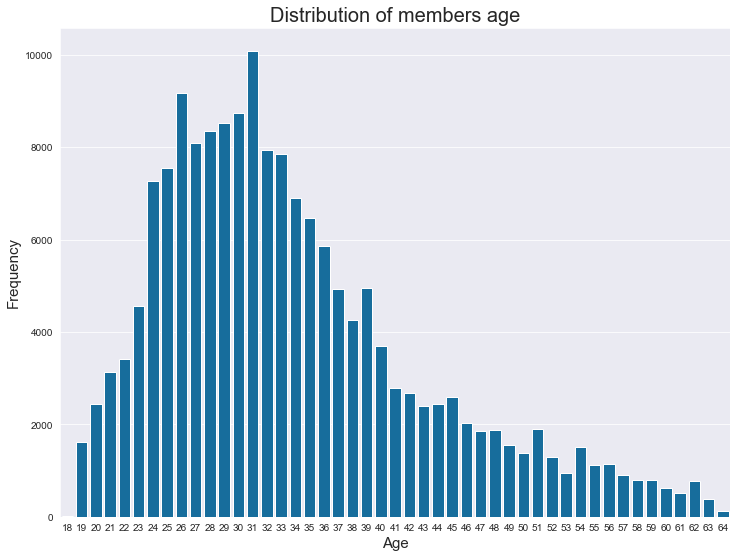

In [4]:
sb.set_style('darkgrid')
plt.figure(figsize=[ 12,9])
plt.title('Distribution of members age', fontsize = 20, loc = 'center');
sb.countplot(data=df_clean, x='age', color = sb.color_palette('colorblind')[0]);
plt.xlabel('Age', fontsize = 15);
plt.ylabel('Frequency', fontsize = 15);


## (Visualization 3)

> We can notice here that Customer tend to take longer trips than Subscribers

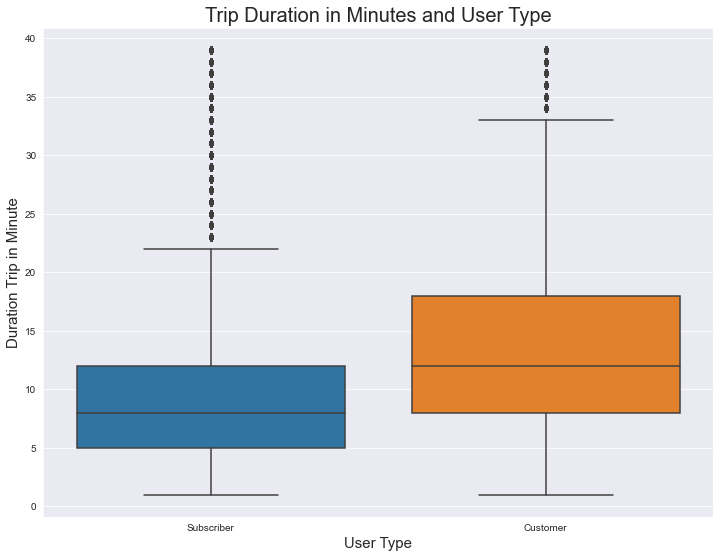

In [5]:
plt.figure(figsize = [12, 9])
sb.boxplot(data=df_clean, x='user_type', y='duration_min');
plt.title('Trip Duration in Minutes and User Type', fontsize = 20, loc = 'center')
plt.xlabel('User Type', fontsize = 15)
plt.ylabel('Duration Trip in Minute', fontsize = 15)
plt.show();

## (Visualization 4)

> Here, we see that Customers tend to do more trips on weekend than Subscribers

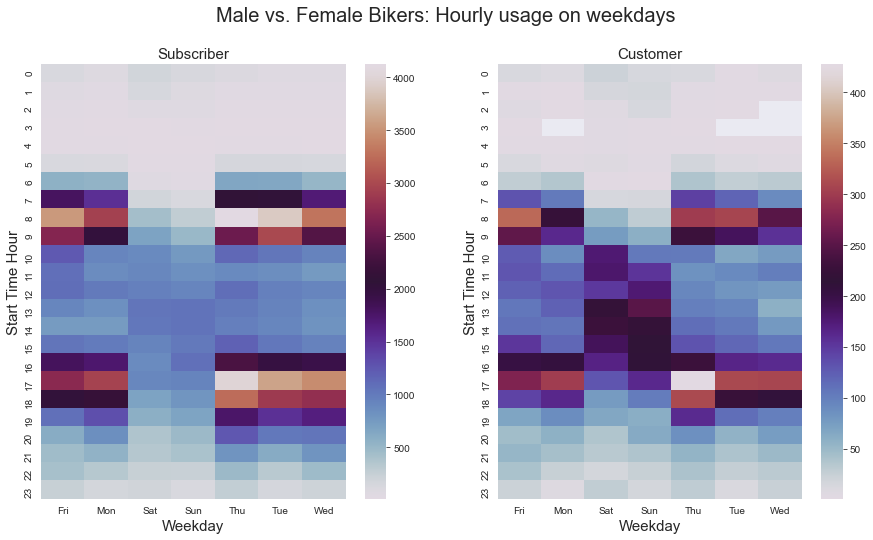

In [6]:
plt.figure(figsize=(15,8))
plt.suptitle('Male vs. Female Bikers: Hourly usage on weekdays', fontsize=20);

# Heatmap - Subscribers
plt.subplot(1, 2, 1)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_day'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_day', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')
plt.title("Subscriber", fontsize=15)
plt.xlabel('Weekday', fontsize=15)
plt.ylabel('Start Time Hour', fontsize=15);

#----------------------------------------------------------------------------------------------------------
# Heatmap - Subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_day'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_day', 'bike_id')
hot_map = sb.heatmap(df_subscriber, cmap = 'twilight')
plt.title("Customer", fontsize=15)
plt.xlabel('Weekday', fontsize=15)
plt.ylabel('Start Time Hour', fontsize=15);


In [ ]:
jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle